In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('loan.csv', error_bad_lines=False, index_col=False, dtype='unicode')

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [4]:
data.shape

(39717, 111)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


## Data Cleaning ##

In [6]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
#Checking the percentage of null or missing values 
percent_missing = data.isnull().sum() * 100 / len(data)

In [9]:
percent_missing

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [10]:
#making decimal to 2 
percent_missing.round(2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [11]:
missing_value_df = pd.DataFrame({'column_name': data.columns,'percent_missing': percent_missing.round(2)})

In [12]:
missing_value_df.sort_values('percent_missing', inplace=True)

In [13]:
missing_value_df

,column_name,percent_missing
id,id,0.0
earliest_cr_line,earliest_cr_line,0.0
inq_last_6mths,inq_last_6mths,0.0
open_acc,open_acc,0.0
pub_rec,pub_rec,0.0
...,...,...
avg_cur_bal,avg_cur_bal,100.0
bc_open_to_buy,bc_open_to_buy,100.0
bc_util,bc_util,100.0
mo_sin_old_rev_tl_op,mo_sin_old_rev_tl_op,100.0


we can see many columns having 100% missing values, so removing them

In [14]:
(missing_value_df['percent_missing'] == 100.00).sum()

54

In [15]:
# List of columns having NULL values
missing_values_columns = missing_value_df[(missing_value_df['percent_missing'] == 100.00)].column_name.tolist()

In [16]:
missing_values_columns

['num_bc_sats',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'mort_acc',
 'num_bc_tl',
 'num_tl_op_past_12m',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'mo_sin_rcnt_tl',
 'num_il_tl',
 'mo_sin_rcnt_rev_tl_op',
 'verification_status_joint',
 'mo_sin_old_il_acct',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'total_bc_limit',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_ut

In [17]:
#we can remove these 54 columns
null_columns_dropped_data = data.drop(missing_values_columns, axis=1)

In [18]:
null_columns_dropped_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0,1,INDIVIDUAL,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [19]:
null_columns_dropped_data = null_columns_dropped_data.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d',
                                                           'mths_since_last_record', 'mths_since_last_delinq'], axis=1)

In [20]:
null_columns_dropped_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,80.9,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,8500,8500,875,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,5000,5000,1325,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,0,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,5000,5000,650,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,0,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [21]:
#We can remove those columns which contain all unique values as they won't provide any insights
null_columns_dropped_data = null_columns_dropped_data.drop(['delinq_amnt', 'acc_now_delinq', 'application_type',
                                                           'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
                                                           'tax_liens', 'collections_12_mths_ex_med'], axis=1)

In [22]:
null_columns_dropped_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
2,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0
3,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0
4,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,1213.88,2500,322.97,0,0,0,Jul-10,80.9,Jun-10,NaN
39713,8500,8500,875,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,1020.51,8500,1413.49,0,0,0,Jul-10,281.94,Jul-10,NaN
39714,5000,5000,1325,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,1397.12,5000,272.16,0,0,0,Apr-08,0,Jun-07,NaN
39715,5000,5000,650,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,672.66,5000,174.2,0,0,0,Jan-08,0,Jun-07,NaN


In [23]:
#Deleting string columns having most of as unique values
null_columns_dropped_data = null_columns_dropped_data.drop(['emp_title'], axis=1)

In [24]:
## Check percentage of missing data
((null_columns_dropped_data.isnull().sum() * 100 / len(null_columns_dropped_data)).sort_values(
    ascending=False)).head(11)

emp_length              2.706650
pub_rec_bankruptcies    1.754916
last_pymnt_d            0.178765
revol_util              0.125891
title                   0.027696
last_credit_pull_d      0.005036
annual_inc              0.000000
zip_code                0.000000
purpose                 0.000000
loan_status             0.000000
issue_d                 0.000000
dtype: float64

In [25]:
null_columns_dropped_data.shape

(39717, 40)

In [26]:
#Count of no of unique values in the column
data = []
for row in null_columns_dropped_data.columns.tolist():
    data.append({'column': row, 'count': len(null_columns_dropped_data[row].unique())})

In [27]:

unique = pd.DataFrame(data).sort_values('count')

In [28]:
unique.head(19)

,column,count
3,term,2
13,loan_status,3
11,verification_status,3
39,pub_rec_bankruptcies,4
23,pub_rec,5
9,home_ownership,5
6,grade,7
21,inq_last_6mths,9
19,delinq_2yrs,11
8,emp_length,12


In [29]:
# null_columns_dropped_data[null_columns_dropped_data.isnull().sum(axis=1) >= 2]
null_columns_dropped_data['term_months'] = null_columns_dropped_data['term'].str.rstrip('months')
del null_columns_dropped_data['term']

In [30]:
#Creating derived columns
null_columns_dropped_data['term_months']

0         36 
1         60 
2         36 
3         36 
4         60 
         ... 
39712     36 
39713     36 
39714     36 
39715     36 
39716     36 
Name: term_months, Length: 39717, dtype: object

In [31]:
null_columns_dropped_data['int_rate_percentage'] = null_columns_dropped_data['int_rate'].str.rstrip('%')
del null_columns_dropped_data['int_rate']

In [32]:
null_columns_dropped_data['emp_length_years'] = null_columns_dropped_data['emp_length'].str.rstrip('years ')
null_columns_dropped_data['emp_length_years'].replace({'10+': '10'}, inplace=True)
null_columns_dropped_data['emp_length_years'][null_columns_dropped_data['emp_length_years'] == '< 1'] = '0.5'
del null_columns_dropped_data['emp_length']

In [33]:
null_columns_dropped_data['revol_util_percentage'] = null_columns_dropped_data['revol_util'].str.rstrip('%')
del null_columns_dropped_data['revol_util']

In [34]:
null_columns_dropped_data['issue_d_month'], null_columns_dropped_data['issue_d_year'] = null_columns_dropped_data[
    'issue_d'].str.split('-').str

null_columns_dropped_data['last_credit_pull_d_month'], null_columns_dropped_data['last_credit_pull_d_year'] = null_columns_dropped_data[
    'last_credit_pull_d'].str.split('-').str

null_columns_dropped_data['last_pymnt_d_month'], null_columns_dropped_data['last_pymnt_d_year'] = null_columns_dropped_data[
    'last_pymnt_d'].str.split('-').str

null_columns_dropped_data['earliest_cr_line_month'], null_columns_dropped_data['earliest_cr_line_year'] = null_columns_dropped_data[
    'earliest_cr_line'].str.split('-').str

In [35]:
null_columns_dropped_data['issue_d_year'] = '20' + null_columns_dropped_data['issue_d_year']


In [36]:
#Updated columns
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage', 'emp_length_years',
          'revol_util_percentage']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].astype(np.float)

In [37]:
null_columns_dropped_data[columns]

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,emp_length_years,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,int_rate_percentage,emp_length_years,revol_util_percentage
0,5000.0,5000.0,4975.0,162.87,24000.0,10.0,27.65,13648.0,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,10.65,10.0,83.7
1,2500.0,2500.0,2500.0,59.83,30000.0,0.5,1.00,1687.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,15.27,0.5,9.4
2,2400.0,2400.0,2400.0,84.33,12252.0,10.0,8.72,2956.0,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,15.96,10.0,98.5
3,10000.0,10000.0,10000.0,339.31,49200.0,10.0,20.00,5598.0,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,13.49,10.0,21.0
4,3000.0,3000.0,3000.0,67.79,80000.0,1.0,17.94,27783.0,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,12.69,1.0,53.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,78.42,110000.0,4.0,11.33,7274.0,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,8.07,4.0,13.1
39713,8500.0,8500.0,875.0,275.38,18000.0,3.0,6.40,8847.0,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,10.28,3.0,26.9
39714,5000.0,5000.0,1325.0,156.84,100000.0,0.5,2.30,9698.0,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,8.07,0.5,19.4
39715,5000.0,5000.0,650.0,155.38,200000.0,0.5,3.72,85607.0,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,7.43,0.5,0.7


In [38]:
# Creating a profit and loss column
null_columns_dropped_data['PnL']=(
    null_columns_dropped_data['total_pymnt']-null_columns_dropped_data['funded_amnt']
)*100/null_columns_dropped_data['funded_amnt']

In [39]:
null_columns_dropped_data['loan_inc_ratio'
                         ] = null_columns_dropped_data.funded_amnt*100/null_columns_dropped_data.annual_inc

In [40]:
columns = ['total_acc', 'term_months', 'issue_d_year']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].astype(np.int)

In [41]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].apply(lambda x: x.astype('category'))

In [42]:
null_columns_dropped_data['annual_inc_lakhs'] = null_columns_dropped_data['annual_inc'] / 1000


In [43]:
null_columns_dropped_data['annual_inc_lakhs'].describe()


count    39717.000000
mean        68.968926
std         63.793766
min          4.000000
25%         40.404000
50%         59.000000
75%         82.300000
max       6000.000000
Name: annual_inc_lakhs, dtype: float64

In [44]:
null_columns_dropped_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,PnL,loan_inc_ratio,annual_inc_lakhs
0,5000.0,5000.0,4975.0,162.87,B,B2,RENT,24000.0,Verified,Dec-11,...,2011,May,16,Jan,15,Jan,85,17.263104,20.833333,24.000
1,2500.0,2500.0,2500.0,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,...,2011,Sep,13,Apr,13,Apr,99,-59.651600,8.333333,30.000
2,2400.0,2400.0,2400.0,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,...,2011,May,16,Jun,14,Nov,01,25.236118,19.588639,12.252
3,10000.0,10000.0,10000.0,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,...,2011,Apr,16,Jan,15,Feb,96,22.318900,20.325203,49.200
4,3000.0,3000.0,3000.0,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,...,2011,May,16,May,16,Jan,96,17.111000,3.750000,80.000


In [45]:
#Count of categorical & numeric columns
numeric_data = null_columns_dropped_data.select_dtypes(include = [np.number])

categorical_data = null_columns_dropped_data.select_dtypes(exclude = [np.number, np.object])

string_data = null_columns_dropped_data.select_dtypes(include = [np.object])

print('There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))

There are 25 numerical , 12 categorical and 14 string features in the training data


In [46]:
## Removing current loan status as it's not needed in the analysis
null_columns_dropped_data = null_columns_dropped_data[null_columns_dropped_data.loan_status !='Current']
null_columns_dropped_data = null_columns_dropped_data.loc[:,null_columns_dropped_data.nunique()!=1]

In [47]:
## Final dataset for Exploratory Data Analytics
df = null_columns_dropped_data

## Univariate Analysis ##

In [48]:
#Univeriate Analysis
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

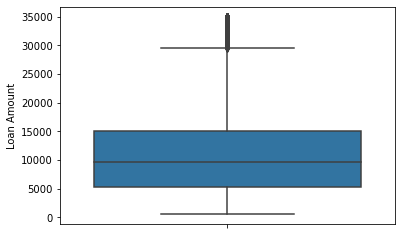

In [49]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()
#The loan amount varies from 0 to 35,000 having mean of 10,000

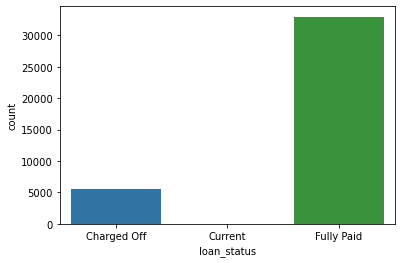

In [50]:
sns.countplot(x= null_columns_dropped_data["loan_status"])
plt.show()

In [51]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

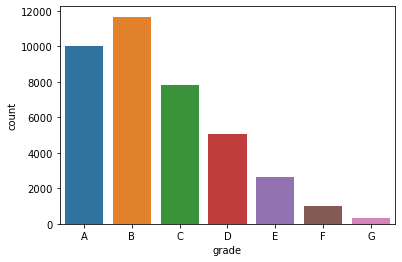

In [52]:
sns.countplot(x='grade', data=df)
plt.show()
# Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

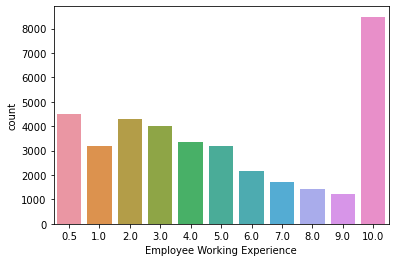

In [53]:
sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()
# Majority of employees applying for the loan have more than 10 years of experience

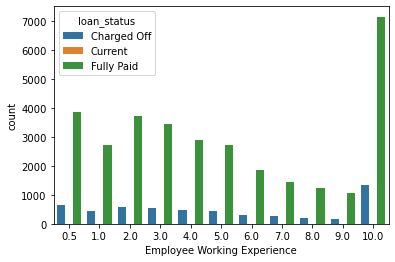

In [54]:
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

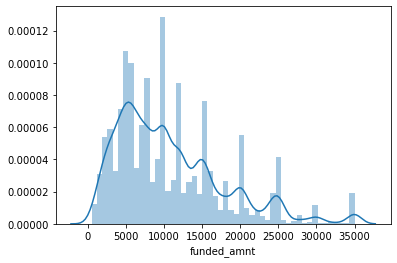

In [55]:
sns.distplot(df['funded_amnt'])
plt.show()
# Funded amount is left skewed. Most of the loan amount given is 5 lakhs

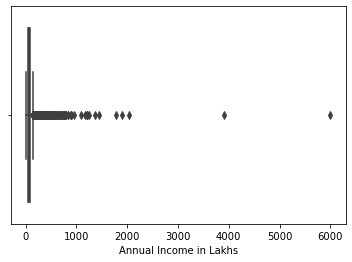

In [56]:
sns.boxplot(x=df['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()
#There are only two applicants having annual income of more than 30 lakhs

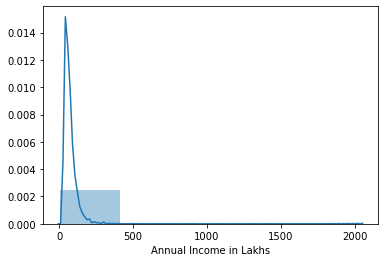

In [57]:
sns.distplot(df[df['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()
#Majority of loan applicants have income less than 5 lakhs

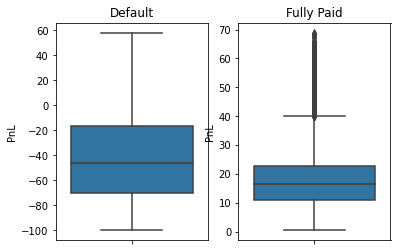

In [58]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df[df.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].PnL)
plt.show()

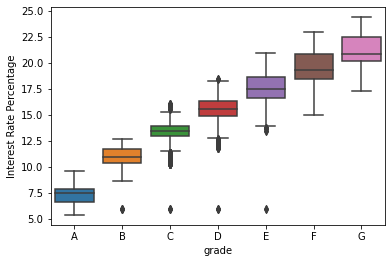

In [59]:
sns.boxplot(y='int_rate_percentage', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

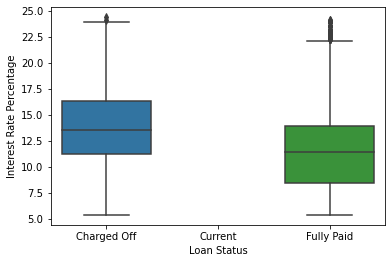

In [60]:
sns.boxplot(y='int_rate_percentage', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

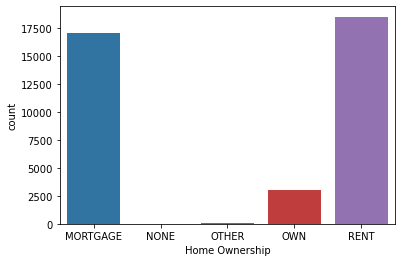

In [61]:
sns.countplot(x='home_ownership', data=df)
plt.xlabel('Home Ownership')
plt.show()

## Segmented Univariate Analysis ##

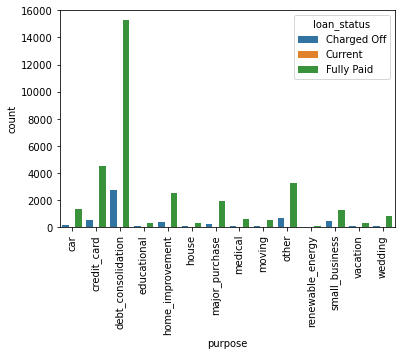

In [62]:
#Segmented Univariate Analysis
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()
#Majority of loan has been given for the debt consolidation purpose and has been fully paid.

In [63]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,PnL,loan_inc_ratio,annual_inc_lakhs
0,5000.0,5000.0,4975.0,162.87,B,B2,RENT,24000.0,Verified,Dec-11,...,2011,May,16,Jan,15,Jan,85,17.263104,20.833333,24.000
1,2500.0,2500.0,2500.0,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,...,2011,Sep,13,Apr,13,Apr,99,-59.651600,8.333333,30.000
2,2400.0,2400.0,2400.0,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,...,2011,May,16,Jun,14,Nov,01,25.236118,19.588639,12.252
3,10000.0,10000.0,10000.0,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,...,2011,Apr,16,Jan,15,Feb,96,22.318900,20.325203,49.200
5,5000.0,5000.0,5000.0,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,...,2011,Jan,16,Jan,15,Nov,04,12.644200,13.888889,36.000


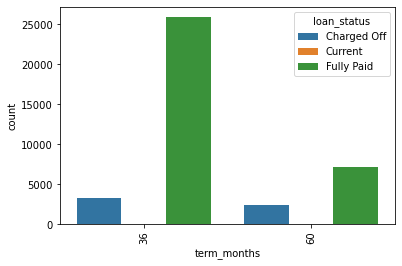

In [64]:
sns.countplot(x='term_months', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

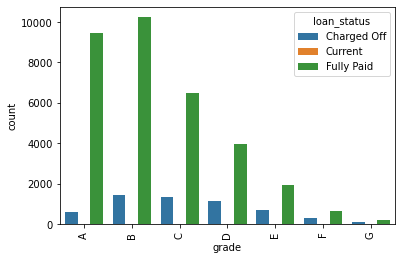

In [65]:
sns.countplot(x='grade', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

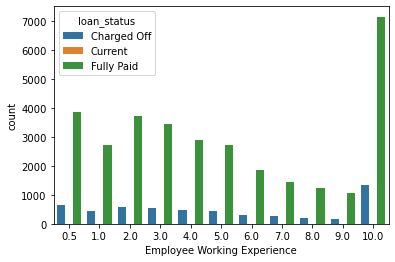

In [66]:
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

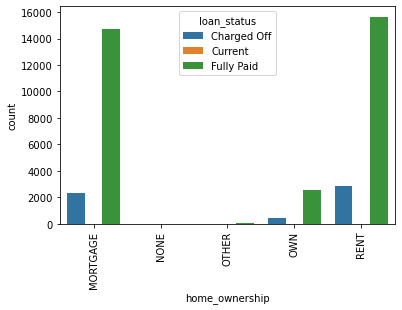

In [67]:
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

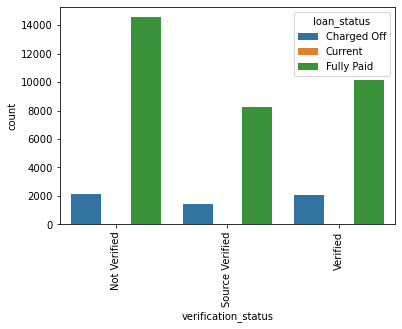

In [68]:
sns.countplot(x='verification_status',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis ##

In [69]:
df['loan_amnt_bin']=pd.cut(df.loan_amnt,4,labels=['low','medium','high','very high'])

In [70]:
df.groupby('loan_status',observed = True)['loan_amnt_bin'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

,loan_status,loan_amnt_bin,percent
0,Fully Paid,low,49.074355
1,Fully Paid,medium,33.899848
2,Fully Paid,high,13.830046
3,Fully Paid,very high,3.195751
4,Charged Off,low,43.948818
5,Charged Off,medium,32.841656
6,Charged Off,high,17.966945
7,Charged Off,very high,5.242580


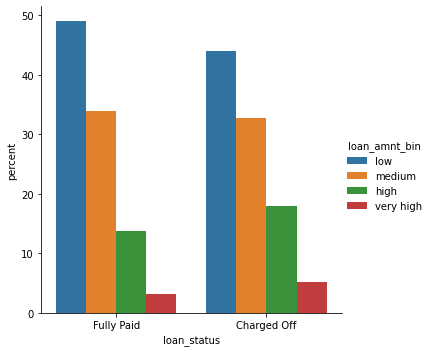

In [71]:
(df.groupby('loan_status',observed = True)['loan_amnt_bin'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'),x='loan_status',y='percent',hue='loan_amnt_bin',kind='bar'))

In [72]:
df.groupby('loan_amnt_bin',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

,loan_amnt_bin,loan_status,percent
0,low,Fully Paid,86.734968
1,low,Charged Off,13.265032
2,medium,Fully Paid,85.804271
3,medium,Charged Off,14.195729
4,high,Fully Paid,81.842672
5,high,Charged Off,18.157328
6,very high,Fully Paid,78.115727
7,very high,Charged Off,21.884273


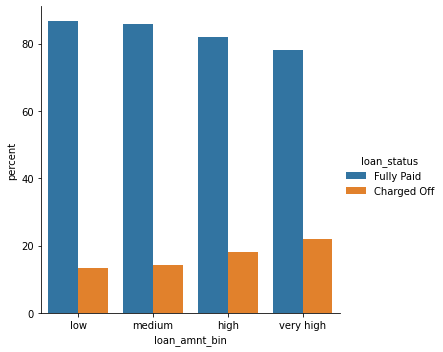

In [73]:
(df.groupby('loan_amnt_bin',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'),x='loan_amnt_bin',y='percent',hue='loan_status',kind='bar'))

#charged off % is more for high and very high loan amounts

In [74]:
df.groupby('loan_status',observed = True)['term_months'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

,loan_status,term_months,percent
0,Fully Paid,36,78.509863
1,Fully Paid,60,21.490137
2,Charged Off,36,57.348498
3,Charged Off,60,42.651502


In [75]:
df.groupby('term_months',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

,term_months,loan_status,percent
0,36,Fully Paid,88.909128
1,36,Charged Off,11.090872
2,60,Fully Paid,74.686215
3,60,Charged Off,25.313785


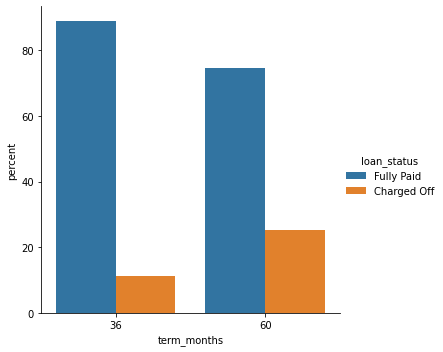

In [76]:
(df.groupby('term_months',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'),x='term_months',y='percent',hue='loan_status',kind='bar'))

#charged off % is more for 60 months term period

In [77]:
df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [78]:
df['annual_inc_bin']=pd.cut(df.annual_inc,[0,50000,150000,300000,6000000],labels=['low','medium','high','very high'])

In [79]:
df.groupby('loan_status',observed = True)['annual_inc_bin'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

,loan_status,annual_inc_bin,percent
0,Fully Paid,medium,57.210926
1,Fully Paid,low,38.773900
2,Fully Paid,high,3.559939
3,Fully Paid,very high,0.455235
4,Charged Off,medium,50.666430
5,Charged Off,low,46.436822
6,Charged Off,high,2.523547
7,Charged Off,very high,0.373201


In [80]:
df.groupby('annual_inc_bin',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

,annual_inc_bin,loan_status,percent
0,low,Fully Paid,83.020339
1,low,Charged Off,16.979661
2,medium,Fully Paid,86.862962
3,medium,Charged Off,13.137038
4,high,Fully Paid,89.201521
5,high,Charged Off,10.798479
6,very high,Fully Paid,87.719298
7,very high,Charged Off,12.280702


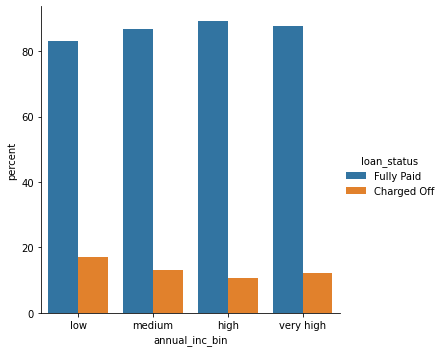

In [81]:
(df.groupby('annual_inc_bin',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'),x='annual_inc_bin',y='percent',hue='loan_status',kind='bar'))

#annual income low have slightly higher charged off %

In [82]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'grade',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'term_months',
       'int_rate_percentage', 'emp_length_years', 'revol_util_percentage',
       'issue_d_month', 'issue_d_year', 'last_credit_pull_d_month',
       'last_credit_pull_d_year', 'last_pymnt_d_month', 'last_pymnt_d_year',
       'earliest_cr_line_month', 'earliest_cr_line_year', 'PnL',
       'loan_inc_ratio', 'annual_inc_lakhs', 'loan_amnt_bin',
       'annual_inc_bin'],
      dtype='object')

In [83]:
df['int_rate_percentage'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate_percentage, dtype: float64

In [84]:
df['int_rate_bin']=pd.cut(df.int_rate_percentage,3,labels=['low','medium','high'])

In [85]:
df.groupby('int_rate_bin',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

,int_rate_bin,loan_status,percent
0,low,Fully Paid,91.156991
1,low,Charged Off,8.843009
2,medium,Fully Paid,81.295175
3,medium,Charged Off,18.704825
4,high,Fully Paid,67.099373
5,high,Charged Off,32.900627


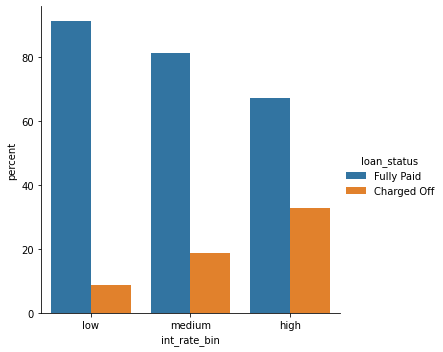

In [86]:
(df.groupby('int_rate_bin',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'),x='int_rate_bin',y='percent',hue='loan_status',kind='bar'))

#higher interest rates tend to have higher % of defaulting or getting charged off

In [87]:
df['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [88]:
df['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [89]:
df['dti_bin']=pd.cut(df.dti,3,labels=['low','medium','high'])

In [90]:
df.groupby('dti_bin',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

,dti_bin,loan_status,percent
0,low,Fully Paid,87.400232
1,low,Charged Off,12.599768
2,medium,Fully Paid,84.860147
3,medium,Charged Off,15.139853
4,high,Fully Paid,83.277962
5,high,Charged Off,16.722038


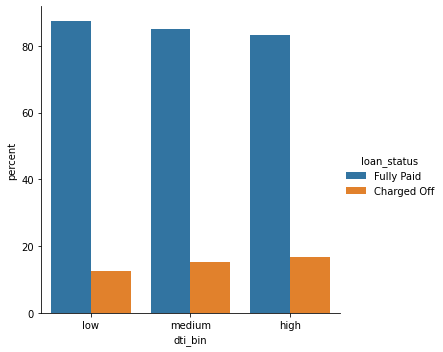

In [91]:
(df.groupby('dti_bin',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'),x='dti_bin',y='percent',hue='loan_status',kind='bar'))

#high debt to income ration have slightly higher Charged off %

In [92]:
df['emp_length_years_bin']=pd.cut(df.emp_length_years,[0,3,6,9,10],labels=['low','medium','high','very high'])

In [93]:
df.groupby('emp_length_years_bin',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

,emp_length_years_bin,loan_status,percent
0,low,Fully Paid,86.126408
1,low,Charged Off,13.873592
2,medium,Fully Paid,85.903033
3,medium,Charged Off,14.096967
4,high,Fully Paid,85.727356
5,high,Charged Off,14.272644
6,very high,Fully Paid,84.319039
7,very high,Charged Off,15.680961


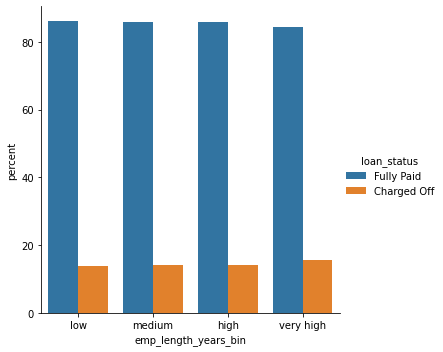

In [94]:
(df.groupby('emp_length_years_bin',observed = True)['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'),x='emp_length_years_bin',y='percent',hue='loan_status',kind='bar'))

#number of years of employment in very high category have slightly higher charged off percentage

## Observations ##

1) charged off % is more for high and very high loan amounts

2) charged off % is more for 60 months term period

3) annual income low have slightly higher charged off %

4) higher interest rates tend to have higher % of defaulting or getting charged off

5) high debt to income ration have slightly higher Charged off %

6) number of years of employment in very high category have slightly higher charged off percentage